In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from alpha_vantage.timeseries import TimeSeries

In [2]:
API_key='H5XXV9E9MU7QMKJ7'


ts=TimeSeries(key=API_key,output_format='pandas')
data=ts.get_daily_adjusted('BRITANNIA.BSE',outputsize='full')
df=data[0]
df=df.reset_index()
df.tail()

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
4528,2005-01-07,834.1420,834.1420,807.5272,812.3168,61.3251,6260.0,0.0,1.0
4529,2005-01-06,813.3562,834.9102,780.9124,819.9534,61.9016,182350.0,0.0,1.0
4530,2005-01-05,849.5054,853.5722,817.8748,826.6862,62.4099,2090100.0,0.0,1.0
4531,2005-01-04,840.4680,849.5054,836.0398,845.3030,63.8154,88030.0,0.0,1.0
4532,2005-01-03,840.4680,849.5054,813.3562,842.3208,63.5902,16330.0,0.0,1.0


In [3]:
df=df.drop(['date'],axis=1)
df=df.drop(['5. adjusted close'],axis=1)
df=df.drop(['7. dividend amount'],axis=1)
df=df.drop(['8. split coefficient'],axis=1)
df.head()

,1. open,2. high,3. low,4. close,6. volume
0,4619.9502,4621.3999,4562.9502,4571.7500,11932.0
1,4596.9500,4623.0000,4565.0000,4573.1500,5657.0
2,4595.0000,4622.0000,4553.1499,4596.8999,9861.0
3,4555.0498,4706.0498,4533.8999,4564.5498,19986.0
4,4525.0000,4568.7002,4507.2500,4518.0498,3668.0


In [4]:
df.set_axis(['open', 'high', 'low','close','volume'], axis='columns', inplace=True)
df.head()

C:\Users\sriva\AppData\Local\Temp\ipykernel_16476\4210984839.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['open', 'high', 'low','close','volume'], axis='columns', inplace=True)


,open,high,low,close,volume
0,4619.9502,4621.3999,4562.9502,4571.7500,11932.0
1,4596.9500,4623.0000,4565.0000,4573.1500,5657.0
2,4595.0000,4622.0000,4553.1499,4596.8999,9861.0
3,4555.0498,4706.0498,4533.8999,4564.5498,19986.0
4,4525.0000,4568.7002,4507.2500,4518.0498,3668.0


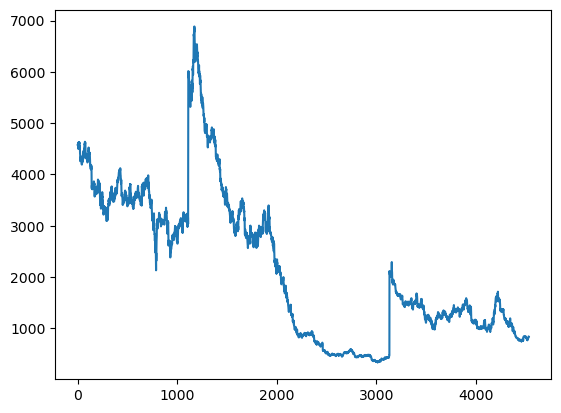

In [5]:
plt.plot(df.close)

In [6]:
df

,open,high,low,close,volume
0,4619.9502,4621.3999,4562.9502,4571.7500,11932.0
1,4596.9500,4623.0000,4565.0000,4573.1500,5657.0
2,4595.0000,4622.0000,4553.1499,4596.8999,9861.0
3,4555.0498,4706.0498,4533.8999,4564.5498,19986.0
4,4525.0000,4568.7002,4507.2500,4518.0498,3668.0
...,...,...,...,...,...
4528,834.1420,834.1420,807.5272,812.3168,6260.0
4529,813.3562,834.9102,780.9124,819.9534,182350.0
4530,849.5054,853.5722,817.8748,826.6862,2090100.0
4531,840.4680,849.5054,836.0398,845.3030,88030.0


In [7]:
ma100=df.close.rolling(100).mean()

In [8]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4528    795.258106
4529    795.595196
4530    796.044802
4531    796.725762
4532    797.454620
Name: close, Length: 4533, dtype: float64

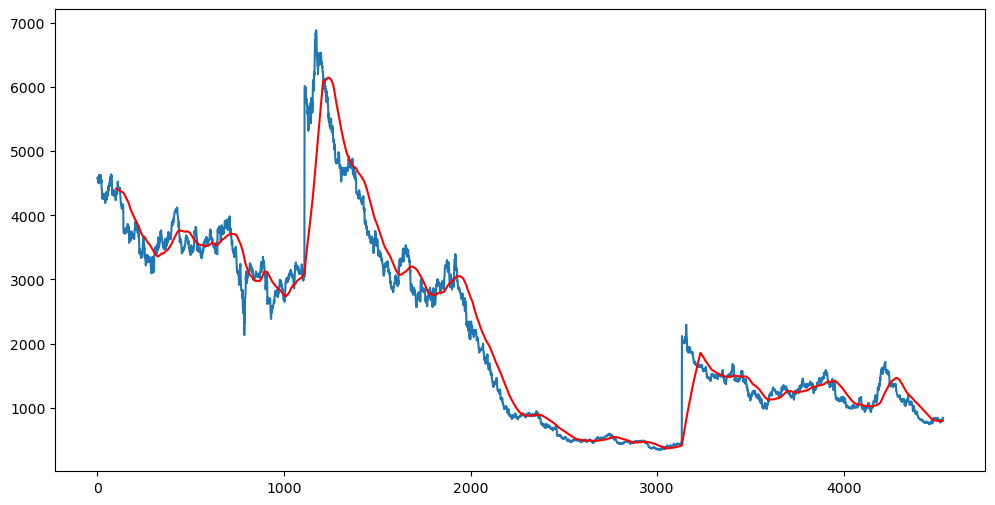

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')

In [10]:
ma200=df.close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4528    879.524519
4529    878.328433
4530    877.037456
4531    876.027539
4532    875.094665
Name: close, Length: 4533, dtype: float64

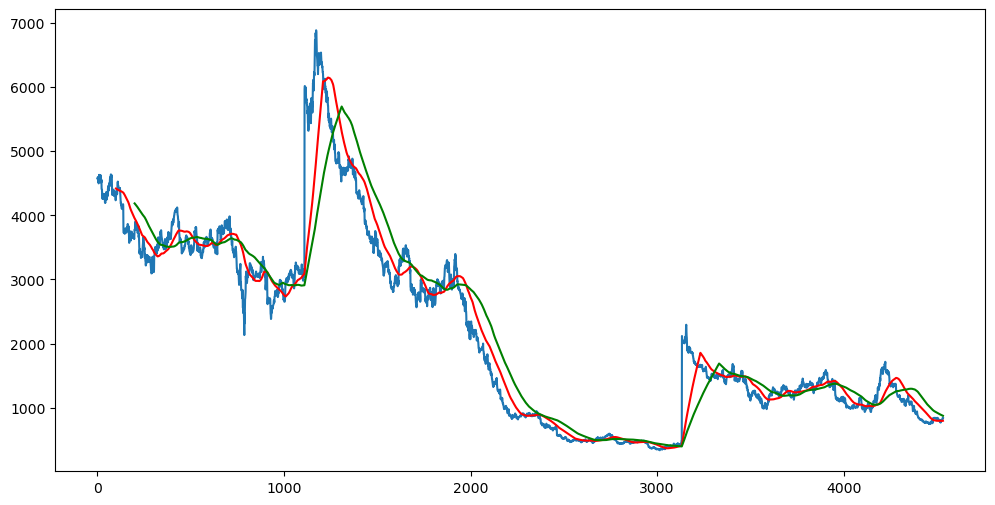

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(4533, 5)

In [13]:
#splitting data into training and testing
train=pd.DataFrame(df['close'][0:int(len(df)*0.70)])
test=pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])
print(train.shape)
print(test.shape)

(3173, 1)
(1360, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
train_array=scaler.fit_transform(train)
train_array

array([[0.6468234 ],
       [0.64703726],
       [0.65066525],
       ...,
       [0.24484823],
       [0.24616959],
       [0.24655913]])

In [16]:
x_train=[]
y_train=[]

for i in range(100,train_array.shape[0]):
  x_train.append(train_array[i-100:i])
  y_train.append(train_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)


In [17]:
x_train.shape

(3073, 100, 1)

In [18]:
from  keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
97/97 [==============================] - 27s 209ms/step - loss: 0.0241
Epoch 2/50
97/97 [==============================] - 18s 185ms/step - loss: 0.0063
Epoch 3/50
97/97 [==============================] - 18s 190ms/step - loss: 0.0055
Epoch 4/50
97/97 [==============================] - 19s 198ms/step - loss: 0.0051
Epoch 5/50
97/97 [==============================] - 24s 250ms/step - loss: 0.0048
Epoch 6/50
97/97 [==============================] - 23s 242ms/step - loss: 0.0044
Epoch 7/50
97/97 [==============================] - 18s 190ms/step - loss: 0.0043
Epoch 8/50
97/97 [==============================] - 18s 187ms/step - loss: 0.0039
Epoch 9/50
97/97 [==============================] - 18s 189ms/step - loss: 0.0038
Epoch 10/50
97/97 [==============================] - 22s 228ms/step - loss: 0.0034
Epoch 11/50
97/97 [==============================] - 24s 246ms/step - loss: 0.0036
Epoch 12/50
97/97 [==============================] - 19s 196ms/step - loss: 0.0033
Epoch 13/50
9

In [23]:
model.save('keras_stock.h5')

In [24]:
past_100_days=train.tail(100)
final_df=past_100_days.append(test,ignore_index=True)

C:\Users\sriva\AppData\Local\Temp\ipykernel_16476\4270281649.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(test,ignore_index=True)


In [25]:
final_df.head()

,close
0,399.00
1,412.30
2,411.25
3,400.25
4,402.00


In [26]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00305167],
       [0.01004946],
       [0.009497  ],
       ...,
       [0.22807861],
       [0.23787383],
       [0.23630475]])

In [27]:
input_data.shape

(1460, 1)

In [28]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
  

In [29]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1360, 100, 1)
(1360,)


In [30]:
#Makin Prediction

y_predict=model.predict(x_test)

43/43 [==============================] - 4s 83ms/step


In [31]:
y_predict.shape

(1360, 1)

In [32]:
y_test

array([0.81692623, 0.80516679, 0.7956961 , ..., 0.22807861, 0.23787383,
       0.23630475])

In [33]:
y_predict

array([[0.7497671 ],
       [0.7532675 ],
       [0.75511116],
       ...,
       [0.18477288],
       [0.18505263],
       [0.18546586]], dtype=float32)

In [34]:
scaler.scale_

array([0.00052615])

In [35]:
scale_factor=1/0.00762951
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

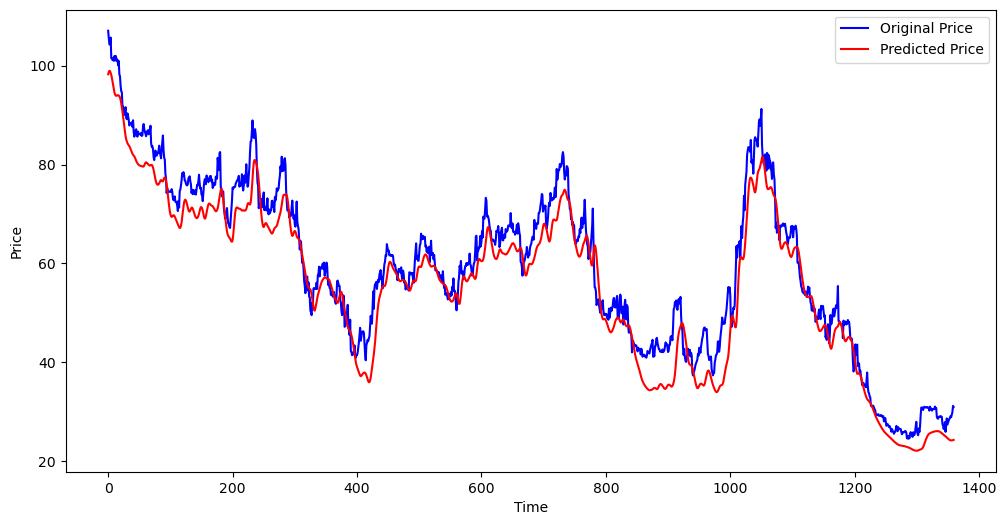

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [37]:
import joblib

In [38]:
joblib.dump(model, 'model.pkl')
print("Model dumped!")

Model dumped!


In [39]:
model = joblib.load('model.pkl')